In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [2]:
def neighbors_1(pos, i, j): # Pretty easy intuitive model for all 8 black neigbours
    n = 0
    
    if pos[(i - 1) % pos.shape[0], j] == 1: # left
        n+=1
    if pos[i, (j - 1) % pos.shape[1]] == 1: # down
        n+=1
    if pos[(i - 1) % pos.shape[0], (j - 1) % pos.shape[1]] == 1: # down-left
        n+=1
    if pos[(i - 1) % pos.shape[0], (j + 1) % pos.shape[1]] == 1: # up-left
        n+=1

    if pos[i, (j + 1) % pos.shape[1]] == 1: # up
        n+=1
    if pos[(i + 1) % pos.shape[0], j] == 1: # right
        n+=1
    if pos[(i + 1) % pos.shape[0], (j - 1) % pos.shape[1]] == 1: # down-right
        n+=1
    if pos[(i + 1) % pos.shape[0], (j + 1) % pos.shape[1]] == 1: # up-right
        n+=1
        
    return n

def neighbors_0(pos, i, j): # Pretty easy intuitive model for all 8 white neigbours
    n = 0
    
    if pos[(i - 1) % pos.shape[0], j] == 0: # left
        n+=1
    if pos[i, (j - 1) % pos.shape[1]] == 0: # down
        n+=1
    if pos[(i - 1) % pos.shape[0], (j - 1) % pos.shape[1]] == 0: # down-left
        n+=1
    if pos[(i - 1) % pos.shape[0], (j + 1) % pos.shape[1]] == 0: # up-left
        n+=1

    if pos[i, (j + 1) % pos.shape[1]] == 0: # up
        n+=1
    if pos[(i + 1) % pos.shape[0], j] == 0: # right
        n+=1
    if pos[(i + 1) % pos.shape[0], (j - 1) % pos.shape[1]] == 0: # down-right
        n+=1
    if pos[(i + 1) % pos.shape[0], (j + 1) % pos.shape[1]] == 0: # up-right
        n+=1
        
    return n


def unhappy_agents(pos, R):
    mov = np.zeros((pos.shape[0], pos.shape[1]))
    a_i = []
    a_j = []
    for i in range(pos.shape[0]):
        for j in range(pos.shape[1]):
            if (neighbors_0(pos, i, j) < R and pos[i, j] == 0) | (neighbors_1(pos, i, j) < R and pos[i, j] == 1):
                mov[i, j] = 1
                a_i.append(i)
                a_j.append(j)

    return mov, a_i, a_j

In [3]:
N = 100
Range = 100 # How many rounds do we have
k = 0
Rs = [i/8 for i in range(9)]
ratio = 0.5 # Let ratio of black/white houses be "ratio" - should be not that big (or for relatively small R all 
            # black houses will be satisfied with their positions). Default - 0.5
N_moving = np.zeros((Range,9))

## R = 0

In [29]:
R_factor = int(Rs[0]*8) # Number of neighbours to be unhappy enough to move
pos = np.zeros((N**2, 1))
pos[:int(np.ceil((1-ratio)*N**2))] = 1
np.random.shuffle(pos)
pos = pos.reshape(N, N)
mov = np.zeros((N, N))
pos_array = []
mov_array = []

for p in range(Range):
    mov, array_i_1, array_j_1 = unhappy_agents(pos, R_factor)
    N_moving[p,R_factor] = len(array_i_1)
    pos_array.append(pos.copy())
    mov_array.append(mov.copy())
    pos_=pos.copy()
    new_ind = np.random.permutation(len(array_i_1))
    for i in range(len(array_i_1)):
        pos_[(array_i_1[new_ind[i]], array_j_1[new_ind[i]])] = pos[(array_i_1[i], array_j_1[i])]
    pos = pos_.copy()                

In [ ]:
%matplotlib auto
fig = plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(pos, vmin=0, vmax=1, cmap='gist_yarg')
title = plt.title('City map for R = %d' % R_factor)

def animate(i): # Animation 
    im.set_array(pos_array[i]) 

ani = animation.FuncAnimation(fig, animate, len(pos_array))

#ani.save('City map for R = %d.gif' % R_factor)

## R = 1

In [30]:
R_factor = int(Rs[1]*8) # Number of neighbours to be unhappy enough to move
pos = np.zeros((N**2, 1))
pos[:int(np.ceil((1-ratio)*N**2))] = 1
np.random.shuffle(pos)
pos = pos.reshape(N, N)
mov = np.zeros((N, N))
pos_array = []
mov_array = []

for p in range(Range):
    mov, array_i_1, array_j_1 = unhappy_agents(pos, R_factor)
    N_moving[p,R_factor] = len(array_i_1)
    pos_array.append(pos.copy())
    mov_array.append(mov.copy())
    pos_=pos.copy()
    new_ind = np.random.permutation(len(array_i_1))
    for i in range(len(array_i_1)):
        pos_[(array_i_1[new_ind[i]], array_j_1[new_ind[i]])] = pos[(array_i_1[i], array_j_1[i])]
    pos = pos_.copy()                

In [28]:
%matplotlib auto
fig = plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(pos, vmin=0, vmax=1, cmap='gist_yarg')
title = plt.title('City map for R = %d' % R_factor)

def animate(i): # Animation 
    im.set_array(pos_array[i]) 

ani = animation.FuncAnimation(fig, animate, len(pos_array))

#ani.save('City map for R = %d.gif' % R_factor)

Using matplotlib backend: Qt5Agg


## R = 2

In [31]:
R_factor = int(Rs[2]*8) # Number of neighbours to be unhappy enough to move
pos = np.zeros((N**2, 1))
pos[:int(np.ceil((1-ratio)*N**2))] = 1
np.random.shuffle(pos)
pos = pos.reshape(N, N)
mov = np.zeros((N, N))
pos_array = []
mov_array = []

for p in range(Range):
    mov, array_i_1, array_j_1 = unhappy_agents(pos, R_factor)
    N_moving[p,R_factor] = len(array_i_1)
    pos_array.append(pos.copy())
    mov_array.append(mov.copy())
    pos_=pos.copy()
    new_ind = np.random.permutation(len(array_i_1))
    for i in range(len(array_i_1)):
        pos_[(array_i_1[new_ind[i]], array_j_1[new_ind[i]])] = pos[(array_i_1[i], array_j_1[i])]
    pos = pos_.copy()                

In [24]:
%matplotlib auto
fig = plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(pos, vmin=0, vmax=1, cmap='gist_yarg')
title = plt.title('City map for R = %d' % R_factor)

def animate(i): # Animation 
    im.set_array(pos_array[i]) 

ani = animation.FuncAnimation(fig, animate, len(pos_array))

#ani.save('City map for R = %d.gif' % R_factor)

Using matplotlib backend: Qt5Agg


## R = 3

In [32]:
R_factor = int(Rs[3]*8) # Number of neighbours to be unhappy enough to move
pos = np.zeros((N**2, 1))
pos[:int(np.ceil((1-ratio)*N**2))] = 1
np.random.shuffle(pos)
pos = pos.reshape(N, N)
mov = np.zeros((N, N))
pos_array = []
mov_array = []

for p in range(Range):
    mov, array_i_1, array_j_1 = unhappy_agents(pos, R_factor)
    N_moving[p,R_factor] = len(array_i_1)
    pos_array.append(pos.copy())
    mov_array.append(mov.copy())
    pos_=pos.copy()
    new_ind = np.random.permutation(len(array_i_1))
    for i in range(len(array_i_1)):
        pos_[(array_i_1[new_ind[i]], array_j_1[new_ind[i]])] = pos[(array_i_1[i], array_j_1[i])]
    pos = pos_.copy()                

In [6]:
%matplotlib auto
fig = plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(pos, vmin=0, vmax=1, cmap='gist_yarg')
title = plt.title('City map for R = %d' % R_factor)

def animate(i): # Animation 
    im.set_array(pos_array[i]) 

ani = animation.FuncAnimation(fig, animate, len(pos_array))

#ani.save('City map for R = %d.gif' % R_factor)

Using matplotlib backend: Qt5Agg


## R = 4

In [43]:
R_factor = int(Rs[4]*8) # Number of neighbours to be unhappy enough to move
pos = np.zeros((N**2, 1))
pos[:int(np.ceil((1-ratio)*N**2))] = 1
np.random.shuffle(pos)
pos = pos.reshape(N, N)
mov = np.zeros((N, N))
pos_array = []
mov_array = []

for p in range(Range):
    mov, array_i_1, array_j_1 = unhappy_agents(pos, R_factor)
    N_moving[p,R_factor] = len(array_i_1)
    pos_array.append(pos.copy())
    mov_array.append(mov.copy())
    pos_=pos.copy()
    new_ind = np.random.permutation(len(array_i_1))
    for i in range(len(array_i_1)):
        pos_[(array_i_1[new_ind[i]], array_j_1[new_ind[i]])] = pos[(array_i_1[i], array_j_1[i])]
    pos = pos_.copy()                

In [ ]:
%matplotlib auto
fig = plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(pos, vmin=0, vmax=1, cmap='gist_yarg')
title = plt.title('City map for R = %d' % R_factor)

def animate(i): # Animation 
    im.set_array(pos_array[i]) 

ani = animation.FuncAnimation(fig, animate, len(pos_array))

#ani.save('City map for R = %d.gif' % R_factor)

## R = 5

In [4]:
R_factor = int(Rs[5]*8) # Number of neighbours to be unhappy enough to move
pos = np.zeros((N**2, 1))
pos[:int(np.ceil((1-ratio)*N**2))] = 1
np.random.shuffle(pos)
pos = pos.reshape(N, N)
mov = np.zeros((N, N))
pos_array = []
mov_array = []

for p in range(Range):
    mov, array_i_1, array_j_1 = unhappy_agents(pos, R_factor)
    N_moving[p,R_factor] = len(array_i_1)
    pos_array.append(pos.copy())
    mov_array.append(mov.copy())
    pos_=pos.copy()
    new_ind = np.random.permutation(len(array_i_1))
    for i in range(len(array_i_1)):
        pos_[(array_i_1[new_ind[i]], array_j_1[new_ind[i]])] = pos[(array_i_1[i], array_j_1[i])]
    pos = pos_.copy()                

In [5]:
%matplotlib auto
fig = plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(pos, vmin=0, vmax=1, cmap='gist_yarg')
title = plt.title('City map for R = %d' % R_factor)

def animate(i): # Animation 
    im.set_array(pos_array[i]) 

ani = animation.FuncAnimation(fig, animate, len(pos_array))

#ani.save('City map for R = %d.gif' % R_factor)

Using matplotlib backend: Qt5Agg


## R = 6

In [36]:
R_factor = int(Rs[6]*8) # Number of neighbours to be unhappy enough to move
pos = np.zeros((N**2, 1))
pos[:int(np.ceil((1-ratio)*N**2))] = 1
np.random.shuffle(pos)
pos = pos.reshape(N, N)
mov = np.zeros((N, N))
pos_array = []
mov_array = []

for p in range(Range):
    mov, array_i_1, array_j_1 = unhappy_agents(pos, R_factor)
    N_moving[p,R_factor] = len(array_i_1)
    pos_array.append(pos.copy())
    mov_array.append(mov.copy())
    pos_=pos.copy()
    new_ind = np.random.permutation(len(array_i_1))
    for i in range(len(array_i_1)):
        pos_[(array_i_1[new_ind[i]], array_j_1[new_ind[i]])] = pos[(array_i_1[i], array_j_1[i])]
    pos = pos_.copy()                

In [ ]:
%matplotlib auto
fig = plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(pos, vmin=0, vmax=1, cmap='gist_yarg')
title = plt.title('City map for R = %d' % R_factor)

def animate(i): # Animation 
    im.set_array(pos_array[i]) 

ani = animation.FuncAnimation(fig, animate, len(pos_array))

#ani.save('City map for R = %d.gif' % R_factor)

## R = 7

In [37]:
R_factor = int(Rs[7]*8) # Number of neighbours to be unhappy enough to move
pos = np.zeros((N**2, 1))
pos[:int(np.ceil((1-ratio)*N**2))] = 1
np.random.shuffle(pos)
pos = pos.reshape(N, N)
mov = np.zeros((N, N))
pos_array = []
mov_array = []

for p in range(Range):
    mov, array_i_1, array_j_1 = unhappy_agents(pos, R_factor)
    N_moving[p,R_factor] = len(array_i_1)
    pos_array.append(pos.copy())
    mov_array.append(mov.copy())
    pos_=pos.copy()
    new_ind = np.random.permutation(len(array_i_1))
    for i in range(len(array_i_1)):
        pos_[(array_i_1[new_ind[i]], array_j_1[new_ind[i]])] = pos[(array_i_1[i], array_j_1[i])]
    pos = pos_.copy()                

In [ ]:
%matplotlib auto
fig = plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(pos, vmin=0, vmax=1, cmap='gist_yarg')
title = plt.title('City map for R = %d' % R_factor)

def animate(i): # Animation 
    im.set_array(pos_array[i]) 

ani = animation.FuncAnimation(fig, animate, len(pos_array))

#ani.save('City map for R = %d.gif' % R_factor)

## R = 8

In [39]:
R_factor = int(Rs[8]*8) # Number of neighbours to be unhappy enough to move
pos = np.zeros((N**2, 1))
pos[:int(np.ceil((1-ratio)*N**2))] = 1
np.random.shuffle(pos)
pos = pos.reshape(N, N)
mov = np.zeros((N, N))
pos_array = []
mov_array = []

for p in range(Range):
    mov, array_i_1, array_j_1 = unhappy_agents(pos, R_factor)
    N_moving[p,R_factor] = len(array_i_1)
    pos_array.append(pos.copy())
    mov_array.append(mov.copy())
    pos_=pos.copy()
    new_ind = np.random.permutation(len(array_i_1))
    for i in range(len(array_i_1)):
        pos_[(array_i_1[new_ind[i]], array_j_1[new_ind[i]])] = pos[(array_i_1[i], array_j_1[i])]
    pos = pos_.copy()                

In [ ]:
%matplotlib auto
fig = plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(pos, vmin=0, vmax=1, cmap='gist_yarg')
title = plt.title('City map for R = %d' % R_factor)

def animate(i): # Animation 
    im.set_array(pos_array[i]) 

ani = animation.FuncAnimation(fig, animate, len(pos_array))

#ani.save('City map for R = %d.gif' % R_factor)

## Plot in logscale (easier to analyze)

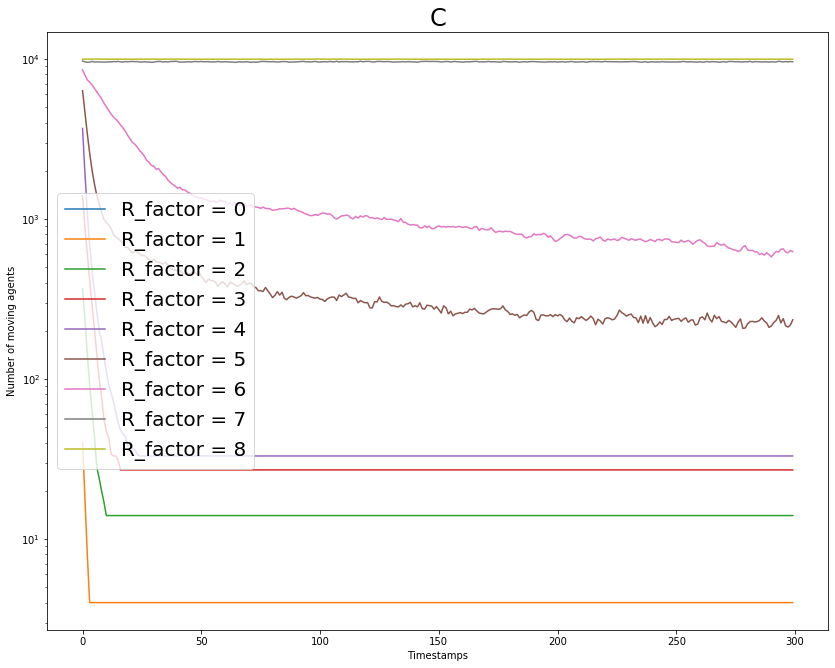

In [44]:
%matplotlib inline
plt.figure(figsize = (14,11))   

for i in range(9):
    plt.plot(range(Range), N_moving[:,i], label = 'R_factor = %d' %i) 
    
plt.rcParams.update({'font.size': 20})
plt.yscale('log')
plt.legend(loc = 'best')
plt.title('C') 
plt.xlabel('Timestamps')
plt.ylabel('Number of moving agents')
plt.show()

## Plot in normal scale 

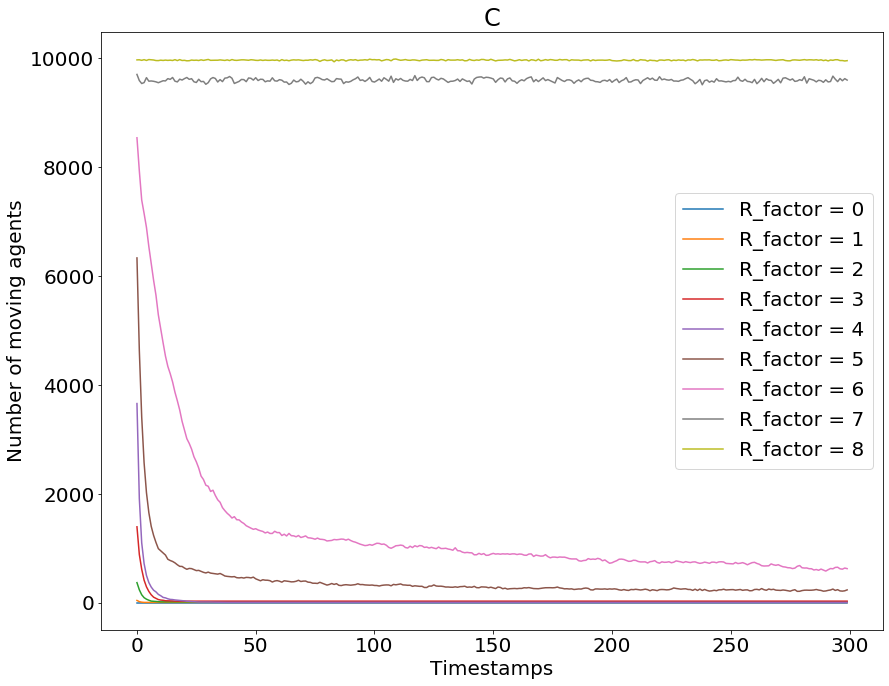

In [42]:
plt.figure(figsize = (14,11))   

for i in range(9):
    plt.plot(range(Range), N_moving[:,i], label = 'R_factor = %d' %i) 
    
plt.rcParams.update({'font.size': 20})
plt.legend(loc = 'best')
plt.title('C') 
plt.xlabel('Timestamps')
plt.ylabel('Number of moving agents')
plt.show()